# Probability in Python

# Importing packages

You can ignore this part for now.

In [1]:
import numpy as np

# Function for uniform outcome

$n$: number of outcomes in the sample space

Output: $m$ outcomes selected uniformly at random from 1 to $n$

In [2]:
def uniform(n, m):
  return np.random.randint(1, n+1, size = m)

# Toss a coin

Toss once, 10 times and 100 times

1: Heads and 2: Tails

In [3]:
print(uniform(2, 1))
print(uniform(2, 10))
print(uniform(2,100))

[1]
[2 2 1 2 2 2 1 1 2 1]
[1 1 1 2 1 2 2 1 2 1 2 1 2 2 2 1 1 2 1 1 2 2 2 2 1 1 2 1 1 2 2 2 2 2 2 1 1
 1 2 2 2 2 2 2 1 1 2 1 2 1 1 1 2 1 1 1 2 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1 2 1
 2 1 2 2 2 1 1 1 1 2 2 2 1 2 2 1 2 2 1 2 2 1 1 2 2 2]


# Throw a die

Throw once, 10 times and 100 times

In [4]:
print(uniform(6, 1))
print(uniform(6, 10))
print(uniform(6,100))

[1]
[2 6 6 1 5 4 6 6 4 1]
[4 4 3 4 1 2 6 3 1 2 1 3 4 1 2 2 6 1 1 6 2 4 4 6 2 1 1 5 1 6 3 1 4 5 4 3 3
 3 6 5 6 2 2 1 2 6 1 4 2 4 3 6 6 3 6 6 5 5 5 6 5 1 2 6 5 6 2 3 2 5 1 1 4 5
 3 3 6 2 2 5 5 2 6 2 3 6 6 3 6 4 2 5 3 6 5 2 4 6 5 6]


# Estimating probability by simulation - Monte Carlo

The probability of an event $A$ can be estimated as follows. We can simulate the experiment repeatedly and independently, say $N$ times, and count the number of times the event occurred, say $N_A$. 

A good estimate of $P(A)$ is the following:
$$P(A) \approx \frac{N_A}{N}$$
As $N$ grows larger and larger, the estimate becomes better and better. This method is generally termed as Monte Carlo simulation.

We will first evaluate probability of coin toss described above using Monte Carlo simulations. There are two steps: generate a large number of tosses and count the number of heads or tails. These two steps can be written in a single loop usually.

You should run the simulation multiple times to see what probability estimate is obtained each time. You will see that the estimate is close to 0.5.

In [5]:
no_heads = 0   #variable for storing number of heads
for i in range(1000): #repeat 1000 times
  if uniform(2, 1) == 1: #check if coin toss is heads
    no_heads = no_heads + 1
print(no_heads/1000) #probability estimate by Monte Carlo

0.501


# Probability of die showing a number

We will modify the Monte Carlo simulation above for finding the probability that a dies shows a number falling in an event $A$. You will see that the estimate is close to $P(A)$. If you change the loop iterations to 10000, the estimate will be much closer to $P(A)$ and more consistent as well. 

In [6]:
no = 0   #variable for storing number of event occurence
for i in range(10000): #repetitions
  die = uniform(6,1)  #experiment
  if die == 1 or die == 3: #Event
    no = no + 1
print(no/10000) #probability estimate by Monte Carlo

0.3343


# Birthday problem

In a group of $n$ persons, what is the chance that some two have the same birthday? Assume birthday of a person is uniformly distributed in $\{1,2,\ldots,365\}$ and is independent of all other birthdays. Most people will think that you need at least 100 persons before you start seeing same birthdays. However, surprisingly perhaps, even with 23 persons there is a 50% chance of two sharing a birthday.

Event $A$: some two have same birthday

Event $A^c$: no two have same birthday

$A^c$: (Birthday 1 on any date $B_1$) and (Birthday 2 on any date other than $B_1$) and (Birthday 3 on any date other than $B_1$, $B_2$) and ... and (Birthday $n$ on any day other than $B_1,B_2,\ldots,B_{n-1}$)

$P(A^c)= 1 \cdot \left(1 - \frac{1}{365}\right)\left(1 - \frac{2}{365}\right)\cdots\left(1 - \frac{n-1}{365}\right)$

If $n=10$, what is the chance? If $n=30$, what is the chance?

We will do a Monte Carlo simulation to estimate the probability and compare with the calculation above.

In [7]:
no = 0   #variable for storing number of event occurence
n = 60 #number of persons
print(1 - np.prod(1-np.arange(1,n)/365)) #probability from expression

for i in range(1000):
  B = np.zeros(366)   #array to keep track of birthdays seen
  for j in range(n): #generate birthdays for each person
    Bi = uniform(365, 1) #i-th birthday
    if B[Bi]  == 0:  #if Bi is seen for the first time
      B[Bi] = 1  #make note that Bi has been seen
    else:
      no = no + 1   #if Bi has been seen before, then two birthdays are same 
      break   #we can stop generating more birthdays and exit loop early

print(no/1000) #probability estimate by Monte Carlo

0.994122660865348
0.996


# Monty Hall problem

Here is the problem taken from the [Wiki page](https://en.wikipedia.org/wiki/Monty_Hall_problem).

> Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

The assumptions (also taken from [Wiki](https://en.wikipedia.org/wiki/Monty_Hall_problem)) are as follows:
1. Car and goats are placed at random behind the doors.
2. Host always picks a door not chosen by contestant.
3. Host always reveals a goat and not a car.
4. Host always offers a choice to switch from the original door to the other closed door.

Under the above assumptions, here are the probabilities of winning.

P(win if contestant chooses to switch) = 2/3

P(win if contestant does not switch) = 1/3

You can see the Wiki page for the computation. Let us simulate and find the probability of winning under switch by Monte Carlo.

In [8]:
no = 0   #variable for storing number of event occurence
for i in range(1000):
  car_loc = uniform(3, 1)
  if car_loc == 1:
    goat1_loc = 2; goat2_loc = 3
  elif car_loc == 2:
    goat1_loc = 1; goat2_loc = 3
  else:
    goat1_loc = 1; goat2_loc = 2

  contestant_orig = uniform(3, 1)
  if contestant_orig == goat1_loc:
    host_reveal_loc = goat2_loc; other_closed_door = car_loc
  elif contestant_orig == goat2_loc:
    host_reveal_loc = goat1_loc; other_closed_door = car_loc
  else:
    host_reveal_loc = goat1_loc; other_closed_door = goat2_loc
  if other_closed_door == car_loc:
    no = no + 1

print(no/1000) #probability estimate by Monte Carlo

0.665


# Polya's urn scheme

Suppose an urn contains $r$ red and $b$ blue balls. The experiment proceeds in multiple steps, where Step $i$ is as follows:

Step $i$: Draw a ball at random, note down its colour and replace it in the urn. Add $c$ more balls of the same colour to the urn.

Let $R_i$ be the event that the $i$-th ball drawn is red. Let $B_i$ be the event that the $i$-th abll drawn is black.

Clearly, $P(R_1) = \frac{r}{r+b}$ and $P(B_1)=\frac{b}{r+b}$. It is perhaps surprising that, irrespective of $c$, we have, for all $i$,
$$P(R_i) = \frac{r}{r+b}, P(B_i) = \frac{b}{r+b}.$$
To prove the above, you can use induction. Assume that the above is true for $i$ and show it is true for $i+1$. Starting with $i=1$, by induction, the statement becomes true.

We will setup a Monte Carlo simulation for verifying $P(R_i)$ above for a few steps.

In [9]:
no = 0   #variable for storing number of event occurence
r = 10; b = 5 #assume 1 to r is red and r+1 to r+b is blue
print(r/(r+b))
for i in range(1000):
  r = 10; b = 5
  c = 3
  for j in range(5): #do 5 steps
    if uniform(r+b, 1) <= r:
      r = r + c
    else:
      b = b + c
  if uniform(r+b, 1) <= r: #in the 6th step, count if red ball drawn
    no = no + 1
print(no/1000) #probability estimate by Monte Carlo

0.6666666666666666
0.676


# Gambler's ruin (simple random walk)

A gambler starting with $k$ units of money plays the following game at a casino:

* If he has $\ge 1$ units of money, a coin is tossed. If heads, the casino pays him 1 unit. If tails, he loses 1 unit to the casino.
* If he loses all money, he goes bankrupt and stops.
* If he gets $N$ units of money, he wins and stops playing.

If $p$ is the probability of heads and $q=1-p$, it can be shown that
$$\text{Pr}(\text{Bankruptcy})=\begin{cases}
1-k/N,&\text{ if }p=q=1/2,\\
\frac{\left(\dfrac{q}{p}\right)^k-\left(\dfrac{q}{p}\right)^N}{1-\left(\dfrac{q}{p}\right)^N}, &\text{ if }p\ne q.
\end{cases}$$
You can see some details of the proof of the above in the [Wiki page](https://en.wikipedia.org/wiki/Gambler%27s_ruin). Suppose $x_k$ denotes the probability of bankruptcy starting with $k$ units. The main idea is to condition on the first toss and derive the following recursive equation:
$$\begin{align}
x_k&=P(\text{Bankruptcy}\ |\ \text{first toss is head})\ p\ +\ P(\text{Bankruptcy}\ |\ \text{first toss is tail})\ q\\
&=x_{k+1}p+x_{k-1}q
\end{align}$$
with boundary conditions $x_0=1$ and $x_N=0$. Solution of the recursive equation results in the above closed form expression for $x_k$.

We are interested in Monte Carlo simulation of Gambler's ruin and verification of the formula for $x_k$. First, we consider the case $p=1/2$.

In [10]:
no = 0   #variable for storing number of event occurence
k = 5; N = 10
print(1-k/N)
for i in range(1000):
  k = 5
  while k > 0 and k < N:
    if uniform(2, 1) == 1:
      k = k + 1
    else:
      k = k - 1
  if k == 0:
    no = no + 1
print(no/1000) #probability estimate by Monte Carlo

0.5
0.497


# Toss a biased coin

For $p\ne q$, we require a method to toss a biased coin. This is accomplished by the following function that generates $m$ coin tosses with probability of heads equal to $p$. Note that a value of 1 represents heads and 2 represents tails as before.

In [11]:
def biased(p, m):
  return 2-(np.random.rand(m) < p)

In [12]:
no_heads = 0   #variable for storing number of heads
p = 0.25
print(p)
for i in range(1000):
  if biased(p, 1) == 1:
    no_heads = no_heads + 1
print(no_heads/1000) #probability estimate by Monte Carlo

0.25
0.268


# Biased Gambler's ruin

We now simulate the biased version of Gambler's ruin.

In [13]:
no = 0   #variable for storing number of event occurence
p = 0.35
qbyp = (1-p)/p
k = 5; N = 10
print((qbyp**k-qbyp**N)/(1-qbyp**N))
for i in range(1000):
  k = 5
  while k > 0 and k < N:
    if biased(p, 1) == 1:
      k = k + 1
    else:
      k = k - 1
  if k == 0:
    no = no + 1
print(no/1000) #probability estimate by Monte Carlo

0.9566941509920124
0.96


# Casino die game
Throw a pair of die. A player bets $k_1$ units of money on whether the sum of the two numbers is Under 7 or Over 7, and $k_2$ units on Equal to 7. For Under 7 and Over 7, the returns are $a$:1, while, for Equal to 7, the returns are $b$:1, if the player wins the bet. If the bet is lost, the unit of money goes to the casino.

The strategy for betting will be to independently and randomly select one of the 3 bets. The simulation will track the average return over a large number of trails.

In [14]:
a = 1.0; b = 4.0
k1 = 1; k2 = 1
print((((a-1)*5-7)*k1+((b-1)-5)*k2)/6/3) #expected gain
avg_return = 0
for i in range(1000):
  bet = uniform(3,1) #1 - Under 7, 2 - Over 7, 3 - Equal to 7
  sum = uniform(6,1) + uniform(6,1)
  if ((bet == 1) and (sum < 7)) or ((bet == 2) and (sum > 7)): #win for Under 7 or Over 7 bet
    avg_return = avg_return + k1*(a-1)/1000
  if (bet == 3) and (sum == 7): #win for Equal to 7 bet
    avg_return = avg_return + k2*(b-1)/1000
  if ((bet == 1) and (sum >= 7)) or ((bet == 2) and (sum <= 7)): #loss for Under 7 or Over 7 bet
    avg_return = avg_return + (-k1)/1000
  if (bet == 3) and (sum != 7): #loss for Equal to 7 bet
    avg_return = avg_return + (-k2)/1000
  
print(avg_return) #simulated gain

-0.5
-0.5080000000000003


# Import statistics module
We will use scipy.stats, which has several functions for statistics and probability distributions. 

In [15]:
import scipy.stats as st

# Expected value of common distributions
The module has functions for generating binomial, geometric, Poisson and other distributions. We will generate a large number of samples and compute the average value and compare with the expected value.

In [16]:
#binomial(20,0.3)
print(20*0.3) #expected value
x = st.binom.rvs(20,0.3,size=1000)
print(np.sum(x)/1000) #average value in simulation

6.0
6.034


In [17]:
#geometric(0.3)
print(1/0.3) #expected value
x = st.geom.rvs(0.3,size=1000)
print(np.sum(x)/1000) #average value in simulation

3.3333333333333335
3.357


In [18]:
#Poisson(6)
print(6) #expected value
x = st.poisson.rvs(6,size=1000)
print(np.sum(x)/1000) #average value in simulation

6
6.103


# Balls and bins
Suppose $m$ balls are thrown independently and uniformly at random into $n$ bins. We will compute the expected number of empty bins by simulation and compare with the theoretical value of $n(1-1/n)^m\approx ne^{-m/n}$.

In [19]:
m = 10; n = 3
print(n*((1-1/n)**m)) #expected value
avg_empty_bins = 0
for i in range(1000):
  no_balls = np.zeros(n, dtype=int) #keep track of balls in bins
  for ball in range(m):
    bin = uniform(n, 1)
    no_balls[bin-1] += 1

  no_empty_bins = 0
  for bin in range(n):
    if no_balls[bin] == 0:
      no_empty_bins += 1

  avg_empty_bins += no_empty_bins/1000.0

print(avg_empty_bins) #average value in simulation

0.0520245897474979
0.04400000000000003


# Common continuous distributions and histograms
Scipy stats module can be used to generate samples from common continuous distributions. We will generate a number of such samples and plot their histogram to confirm that the samples follow the expected density function.

For histograms, we will use the hist() function from the matplotlib.pyplot module imported below.

In [20]:
import matplotlib.pyplot as plt

## Uniform distribution
We will begin with the uniform distribution.

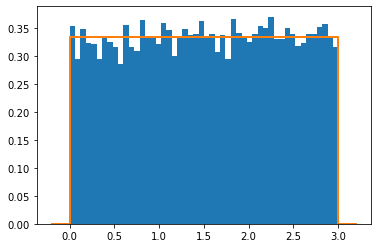

In [21]:
x = st.uniform.rvs(0,3,size=10000)
plt.hist(x,bins=50,range=(0,3),density=True) #blue histogram
plt.plot([-0.2,0,0,3,3,3.2],[0,0,1.0/3,1.0/3,0,0],lw=2) #orange line. uniform[0,3] density
plt.show()

## From histogram to density
The code above generates 10000 samples that are supposed to be independent and uniformly distributed in $[0,3]$. The histogram, created using the plt.hist command, uses 100 bins of equal width in the range $[0,3]$. So, the bins are $[0,0.03),[0.03,0.06),\ldots,[2.97,3]$. 

Suppose the number of samples that fall into the bin $[0,0.03]$ is $N_0$. Then, by Monte Carlo, we have that 
$$P(0<X\le 0.03)\approx \frac{N_0}{10000},$$ 
where $X$ is a random variable with the sample distribution. Assuming that the density of $X$ satisfies $f_X(x)\approx f_X(0.015)$ over the bin ($0.015$ is the midpoint of the bin), we get
$$P(0<X\le 0.03)\approx 0.03f_X(0.015)\approx\frac{N_0}{10000}.$$
Using the above, we get 
$$f_X(0.015)\approx\frac{N_0}{300}.$$ 
Similarly, if $N_i$ is the number of samples in the $i$-th bin with midpoint $x_i$, we have
$$f_X(x_i)\approx\frac{N_i}{300}.$$
The option density=True in the plt.hist command specifies that the above calculation is to be done.

The plt.plot command plots the expected PDF as a line plot. The parameter lw specifies the linewidth and 2 pts.

Try changing the bin size to see how the plot changes. Does 50 bins look better? Why?

## Exponential distribution
We will next repeat the same for $X\sim$ Exp$(\lambda)$. The PDF is
$$f_X(x)=\lambda\exp(-\lambda x),$$
where $\lambda$ is called the scale parameter. Try changing the various parameters below to see what happens.

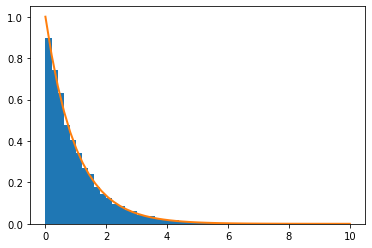

In [22]:
x = st.expon.rvs(scale=1,size=10000)
plt.hist(x,bins=50,range=(0,10),density=True) #blue histogram
xp = np.linspace(0,10,50)
plt.plot(xp,st.expon.pdf(xp,scale=1),lw=2) #orange line, exp(\lambda) density
plt.show()

## Normal distribution
We will repeat the same for $X\sim$ Normal$(\mu,\sigma^2)$. The PDF is
$$f_X(x)=\frac{1}{\sigma\sqrt{2\pi}}\exp(-(x-\mu)^2/2\sigma^2),$$
where the mean $\mu$ is called the location parameter `loc' and $\sigma$ is called the scale parameter.

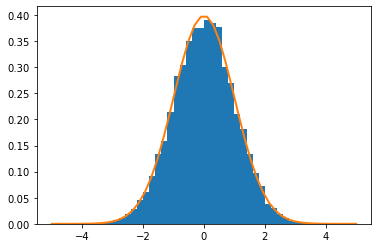

In [23]:
x = st.norm.rvs(loc=0, scale=1, size=10000)
plt.hist(x,bins=50,range=(-5,5),density=True) #blue histogram
xp = np.linspace(-5,5,50)
plt.plot(xp,st.norm.pdf(xp,loc=0,scale=1),lw=2) #orange line, normal pdf
plt.show()

In [24]:
from sklearn.datasets import load_iris

In [25]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

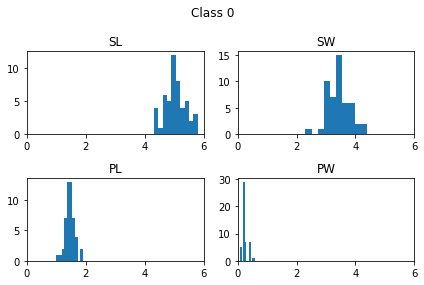

In [26]:
plt.subplot(221)
plt.hist(iris.data[:50,0])
plt.xlim([0,6])
plt.title('SL')
plt.subplot(222)
plt.hist(iris.data[:50,1])
plt.xlim([0,6])
plt.title('SW')
plt.subplot(223)
plt.hist(iris.data[:50,2])
plt.xlim([0,6])
plt.title('PL')
plt.subplot(224)
plt.hist(iris.data[:50,3])
plt.xlim([0,6])
plt.title('PW')
plt.suptitle('Class 0')
plt.tight_layout()
plt.show()